In [173]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import random as rnd
import statistics as stat
import numpy as np

# Model

Will ich das ganze hier Objektorientiert angehen? Ich könnte jeden Akteur als Objekt betrachten, mit assesment und peers. Ich frage mich aber auch schon, ob das Programm dann schnell läuft, oder ob es sich noch irgendwie optimieren lässt.

Große Frage: Wie programmiere ich die Zeitschritte optimal?

Ich will:

- update the assesment of every agent to their observation and the mean of their peers
- update the peers of every agent

Dabei frage ich mich, ob ich die peers von jedem agent schneller finden kann als, indem ich jedes mal jeden anderen Akteur betrachte. (Das ist wichtig, weil die Simulationen sonst lange dauern)

Das ginge, wenn ich die Akteure in einer Liste speichere, die nach ihrem assesment sortiert ist. Dann muss ich mich nur vom gegenwärtigen Akteur nach links und rechts vortasten und kann aufhören, sobald ich zwei finde, die weiter weg sind als epsilon. Ich müsste also die Liste sortieren, nachdem ich die assesments geupdated habe. Könnte sein, dass ich dabei ein paar Schritte spare.

Ich programmiere es jetzt erstmal brute force und wenn ich Geschwindigkeitsprobleme kriege, probier ich die Version.

In [174]:
# --- globals --- #

# let there be n agents with random initial assesements
# every agent is represented by an integer in [0, n)
n = 20
epsilon = .3
alpha = .4
noise = .3
tau = .1
max_time = 50
data = []

In [182]:
# --- classes --- #

class Agent:
    def __init__(self, id):
        self.assesment = 1 - rnd.random() # values in (0, 1]
        self.previous_assesment = self.assesment # later needed to make the assesments of all agents change simultaneously
        self.peers = set()
        self.id = id
    
    def __str__(self):
        return f"assesment: {self.assesment} and peers: {self.peers}"

    def __repr__(self):
        return f"(Agent [{self.id}]: {self.assesment:.2f}, {self.peers})"

    def update_peers(self, agent_list):
        for potential_peer in agent_list:
            if (abs(potential_peer.assesment - self.assesment) < epsilon):
                self.peers.add(potential_peer)

In [176]:
# --- functions --- #

def print_agent_list(agent_list):
    print("[")
    for agent in agent_list:
        representation = f"    (Agent [{agent.id}]: {agent.assesment:.2f}, " + "{"
        representation += ", ".join(f"[{peer.id}]" for peer in agent.peers) + "})"
    
        print(representation)
    print("]")

In [177]:
# --- main code for abm --- #

agents = []
for i in range(n):
    agent = Agent(i)
    agents.append(agent)
    data.append([agent.id, 0, agent.assesment])

print_agent_list(agents)
print(data)

[
    (Agent [0]: 0.56, {})
    (Agent [1]: 0.53, {})
    (Agent [2]: 0.10, {})
    (Agent [3]: 0.42, {})
    (Agent [4]: 0.86, {})
    (Agent [5]: 0.54, {})
    (Agent [6]: 0.18, {})
    (Agent [7]: 0.49, {})
    (Agent [8]: 0.09, {})
    (Agent [9]: 0.64, {})
    (Agent [10]: 0.73, {})
    (Agent [11]: 0.89, {})
    (Agent [12]: 0.50, {})
    (Agent [13]: 0.81, {})
    (Agent [14]: 0.47, {})
    (Agent [15]: 1.00, {})
    (Agent [16]: 0.13, {})
    (Agent [17]: 0.82, {})
    (Agent [18]: 0.29, {})
    (Agent [19]: 0.06, {})
]
[[0, 0, 0.5572886071315856], [1, 0, 0.5303658583115389], [2, 0, 0.09636258742232806], [3, 0, 0.42069519416731194], [4, 0, 0.8640795664493025], [5, 0, 0.541327913987563], [6, 0, 0.17630969593462287], [7, 0, 0.49012690462597264], [8, 0, 0.09138692663514203], [9, 0, 0.6443714296679096], [10, 0, 0.7314655941544896], [11, 0, 0.8914189626623342], [12, 0, 0.49996635401370626], [13, 0, 0.8148994981569093], [14, 0, 0.4743397705694239], [15, 0, 0.9973567752331631], [16, 0

In [178]:
# for each agent let there be a set of agents with similar assesments
for i in range(n):
    agents[i].update_peers(agents)

print_agent_list(agents)

[
    (Agent [0]: 0.56, {[14], [7], [18], [16], [13], [9], [19], [5], [3], [2], [10], [1], [6], [12], [8], [17]})
    (Agent [1]: 0.53, {[14], [7], [18], [16], [0], [13], [9], [19], [5], [3], [2], [10], [6], [12], [8], [17]})
    (Agent [2]: 0.10, {[18], [16], [19], [6], [8]})
    (Agent [3]: 0.42, {[14], [7], [18], [16], [0], [9], [19], [5], [2], [1], [6], [12], [8]})
    (Agent [4]: 0.86, {[18], [16], [19], [5], [2], [1], [17], [7], [10], [6], [14], [0], [13], [3], [12], [8], [15], [11], [9]})
    (Agent [5]: 0.54, {[14], [7], [18], [16], [0], [13], [9], [19], [3], [2], [10], [1], [6], [12], [8], [17]})
    (Agent [6]: 0.18, {[14], [18], [16], [19], [3], [2], [8]})
    (Agent [7]: 0.49, {[14], [18], [16], [0], [9], [19], [5], [3], [2], [10], [1], [6], [12], [8]})
    (Agent [8]: 0.09, {[18], [16], [19], [2], [6]})
    (Agent [9]: 0.64, {[14], [4], [7], [18], [16], [11], [0], [13], [19], [5], [3], [2], [10], [1], [6], [12], [8], [17]})
    (Agent [10]: 0.73, {[4], [18], [16], [19], [5

In [179]:
# for each time step
for u in range(1, max_time): # we did the fist step by setting everything up

    # update the assesment of each agent to a ratio between the agents assesments and the mean of their peers
    for agent in agents:

        # observing
        observation = np.random.normal(tau, noise/2) # random value from bell curve around tau with noise as 2 std deviations
        while observation <= 0 or observation > 1: # cutting off observations outside (0, 1]
            observation = np.random.normal(tau, noise/2)
        observation *= (1 - alpha)

        # listening to peers
        collective_peer_assesment = alpha * stat.mean([peer.previous_assesment for peer in agent.peers])

        agent.assesment = observation + collective_peer_assesment
        data.append([agent.id, u, agent.assesment])

    # update each agents peers and prepare previous assesment for next loop
    for agent in agents:
        agent.update_peers(agents)
        agent.previous_assesment = agent.assesment
    
    print_agent_list(agents)

        

[
    (Agent [0]: 0.46, {[4], [18], [16], [19], [5], [2], [1], [17], [7], [10], [6], [14], [13], [3], [12], [8], [15], [11], [9]})
    (Agent [1]: 0.24, {[4], [18], [16], [19], [5], [2], [17], [7], [10], [6], [14], [0], [13], [3], [12], [8], [15], [11], [9]})
    (Agent [2]: 0.20, {[4], [18], [16], [19], [5], [1], [17], [7], [10], [6], [14], [0], [13], [3], [12], [8], [15], [11], [9]})
    (Agent [3]: 0.18, {[4], [18], [16], [19], [5], [2], [1], [17], [7], [10], [6], [14], [0], [13], [12], [8], [15], [11], [9]})
    (Agent [4]: 0.35, {[18], [16], [19], [5], [2], [1], [17], [7], [10], [6], [14], [0], [13], [3], [12], [8], [15], [11], [9]})
    (Agent [5]: 0.30, {[4], [18], [16], [19], [2], [1], [17], [7], [10], [6], [14], [0], [13], [3], [12], [8], [15], [11], [9]})
    (Agent [6]: 0.19, {[4], [18], [16], [19], [5], [2], [1], [17], [7], [10], [14], [0], [13], [3], [12], [8], [15], [11], [9]})
    (Agent [7]: 0.24, {[4], [18], [16], [19], [5], [2], [1], [17], [10], [6], [14], [0], [13], 

In [180]:
dataframe = pd.DataFrame(data, columns=["agent", "time", "assesment"])
dataframe

,agent,time,assesment
0,0,0,0.557289
1,1,0,0.530366
2,2,0,0.096363
3,3,0,0.420695
4,4,0,0.864080
...,...,...,...
995,15,49,0.411023
996,16,49,0.283981
997,17,49,0.251075
998,18,49,0.339575


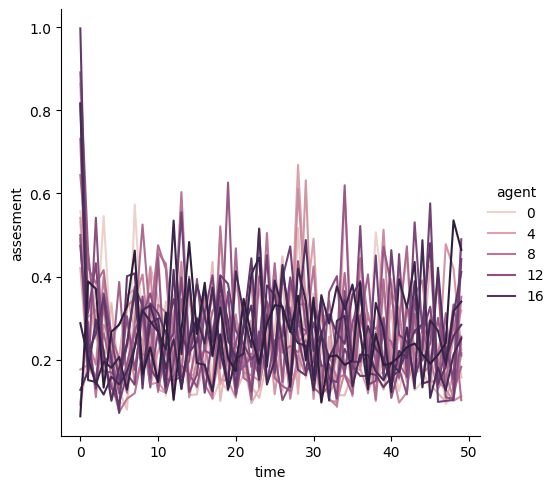

In [181]:
sns.relplot(
    data=dataframe, kind="line",
    x="time", y="assesment", hue="agent")